In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from brian2 import *
from syncological import ei2
from fakespikes import neurons, util, rates

In [20]:
seed = 42

# ------------------------------------------------------------
# Model params
name = 'test'
time = 1

I_e = 0.2
I_i = 0.1

w_e = 5.0
w_i = 0.5

w_ee = 1.0
w_ii = 0.5
w_ei = .5
w_ie = 2.0

# ------------------------------------------------------------
# Create input
N_stim = 100
dt = 0.001
nrns = neurons.Spikes(N_stim, time, dt=dt, seed=seed)

Istim = 20  # Avg rate of 'natural' stimulation
Sstim = 0.001 * Istim  # Avg st dev of natural firing

stim = rates.stim(nrns.times, Istim, Sstim, seed)

spks_stim = nrns.poisson(stim)
ns, ts = util.to_spiketimes(nrns.times, spks_stim)

# ------------------------------------------------------------
# Run
result = ei2.model(name, time, N_stim, ts, ns, 
         w_e, w_i, w_ei, w_ie, w_ee, w_ii,
         I_e=I_e, I_i=I_i, verbose=True, seed=seed)

# ------------------------------------------------------------
# Unpack results
spikes_e = result['spikes_e']
spikes_stim = result['spikes_stim']
spikes_i = result['spikes_i']
pop_e = result['pop_e']
pop_stim = result['pop_stim']
traces_e = result['traces_e']
traces_i = result['traces_i']

ts_e = spikes_e.t_[:]
ts_stim = spikes_stim.t_[:]

ns_e = spikes_e.i_[:]
ns_stim = spikes_stim.i_[:]

ts_i = spikes_i.t_[:]
ns_i = spikes_i.i_[:]

v_e = traces_e.V_[:]
v_i = traces_i.V_[:]

INFO       No numerical integration method specified for group 'neurongroup_2', using method 'euler' (took 0.14s, trying other methods took 1.46s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup_3', using method 'euler' (took 0.14s, trying other methods took 1.46s). [brian2.stateupdaters.base.method_choice]


>>> Running
Starting simulation at t=0. s for a duration of 1. s
115.89 ms (11%) simulated in 10s, estimated 1m 16s remaining.
231.91 ms (23%) simulated in 20s, estimated 1m 6s remaining.
0.34753 s (34%) simulated in 30s, estimated 56s remaining.
0.46479 s (46%) simulated in 40s, estimated 46s remaining.
0.58228 s (58%) simulated in 50s, estimated 36s remaining.
0.69737 s (69%) simulated in 1m 0s, estimated 26s remaining.
0.8146 s (81%) simulated in 1m 10s, estimated 16s remaining.
0.93205 s (93%) simulated in 1m 20s, estimated 6s remaining.
1. s (100%) simulated in 1m 25s
>>> Analyzing and saving


3.74071677304e-05


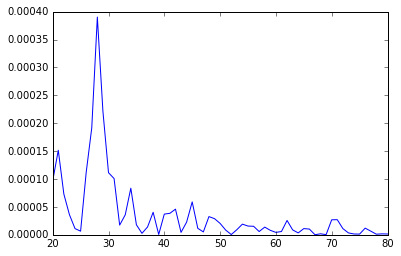

In [21]:
# Power!
lfp = (np.abs(traces_e.g_e.sum(0)) +
       np.abs(traces_e.g_i.sum(0)) +
       np.abs(traces_e.g_ee.sum(0)))
fs, spec = util.create_psd(lfp, 1/result['dt'])

m = np.logical_and(fs >= 20, fs <= 80)
plt.plot(fs[m], spec[m])
gamma_pow = np.mean(spec[m])
print gamma_pow

WARNING    /home/ejp/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
 [py.warnings]
  warnings.warn("No labelled objects found. "



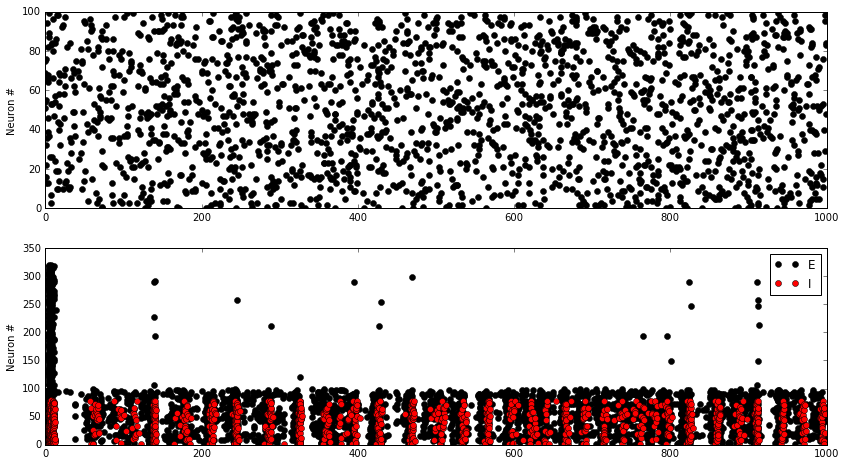

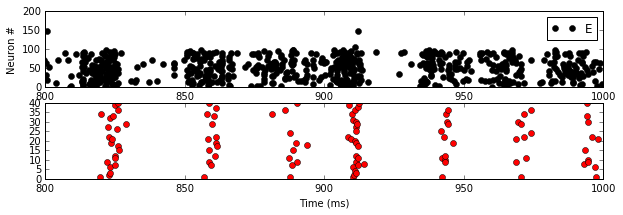

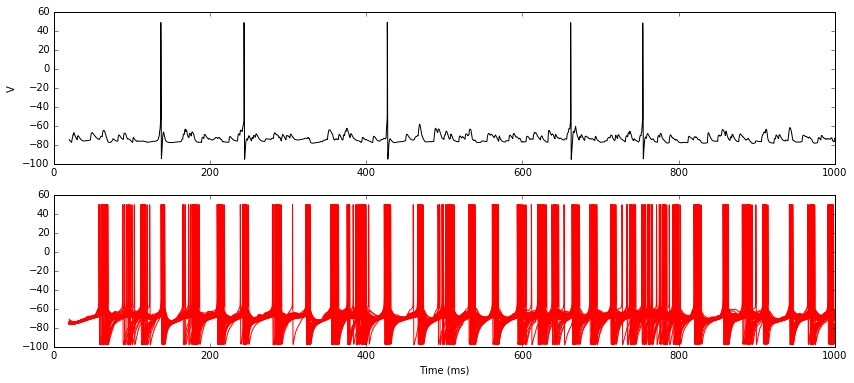

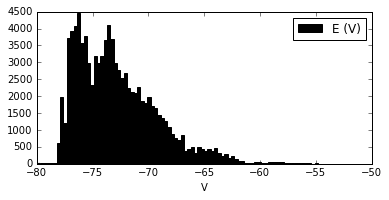

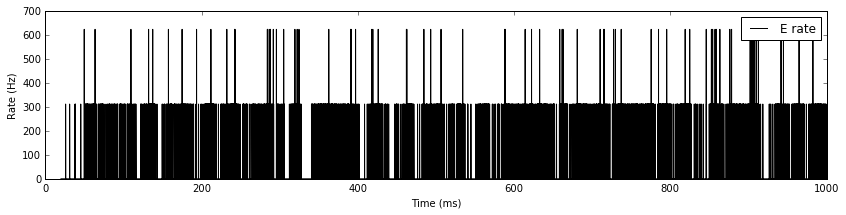

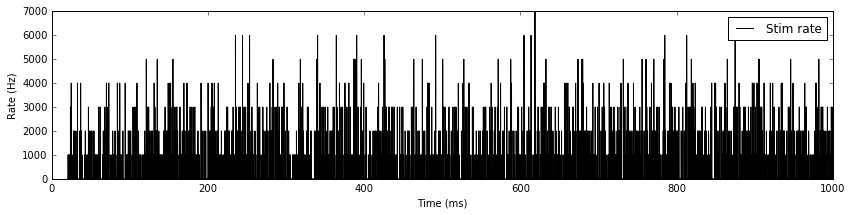

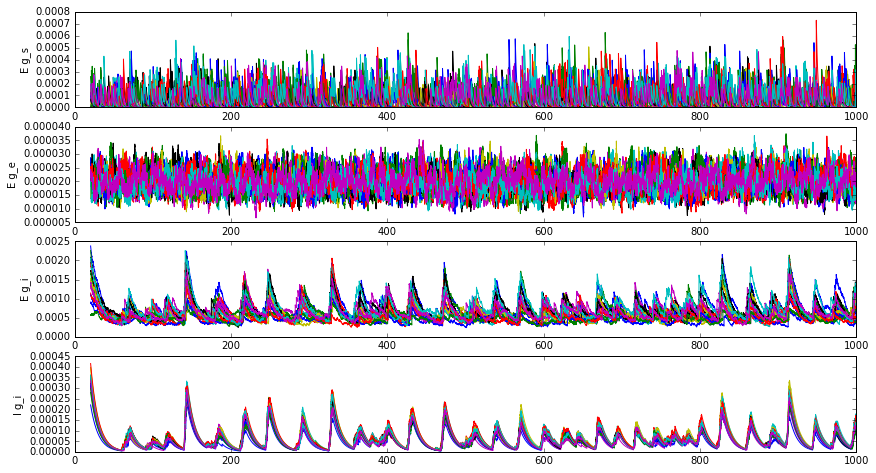

In [22]:
# ------------------------------------------------------------
# Raster full
close()
t_min = 0
t_max = time

figure(figsize=(14, 12))
subplot(311)
plot(spikes_stim.t/ms, spikes_stim.i, 'o', label='', color='k')
xlim(t_min * 1000, t_max * 1000)
ylabel("Neuron #")
legend()

subplot(312)
plot(spikes_e.t/ms, spikes_e.i, 'o', label='E', color='k')
plot(spikes_i.t/ms, spikes_i.i, 'o', label='I', color='r')
xlim(t_min * 1000, t_max * 1000)
ylabel("Neuron #")
legend()


# Raster zoom
figure(figsize=(10, 3))
subplot(211)
plot(spikes_e.t/ms, spikes_e.i, 'o', label='E', color='k')
ylabel("Neuron #")
ylim(0, 200)
xlim(t_max * 1000 - 200, t_max * 1000)
legend()

subplot(212)
plot(spikes_i.t/ms, spikes_i.i, 'o', label='I', color='r')
xlabel("Time (ms)")
ylim(0, 40)
xlim(t_max * 1000 - 200, t_max * 1000)

# ------------------------------------------------------------
# V 
tn = 2000
figure(figsize=(14, 6))
subplot(211)
plot(traces_e.t[tn:]/ms, traces_e.V[0, tn:].T/mvolt, color='k')
# ylim(-90, -50)
ylabel("V")
legend()

subplot(212)
plot(traces_i.t[tn:]/ms, traces_i.V[:, tn:].T/mvolt, color='r')
xlabel("Time (ms)")
legend()

# V hist
figure(figsize=(6,6))
subplot(211)
hist(traces_e.V[0][tn:]/mvolt, label='E (V)', color='k', bins=100, range=(-80, -50))
xlabel("V")
legend()

# ------------------------------------------------------------
# E rate
figure(figsize=(14, 3))
plot(pop_e.t[tn:]/ms, pop_e.rate[tn:]/Hz, color='k', label='E rate')
ylabel('Rate (Hz)')
xlabel("Time (ms)")
legend()

figure(figsize=(14, 3))
plot(pop_stim.t[tn:]/ms, pop_stim.rate[tn:]/Hz, color='k', label='Stim rate')
ylabel('Rate (Hz)')
xlabel("Time (ms)")
legend()

# ------------------------------------------------------------
figure(figsize=(14, 12))
subplot(611)
plot(traces_e.t[tn:]/ms, traces_e.g_s[1:20, tn:].T, label='E (g_s)')
ylabel("E g_s")

subplot(612)
plot(traces_e.t[tn:]/ms, traces_e.g_e[1:20, tn:].T, label='E (g_e)')
ylabel("E g_e")

subplot(613)
plot(traces_e.t[tn:]/ms, traces_e.g_i[1:20, tn:].T, label='E (g_i)')
ylabel("E g_i")

subplot(614)
plot(traces_i.t[tn:]/ms, traces_i.g_i[1:20, tn:].T, label='I (g_i)')
ylabel("I g_i")
# legend(loc='best')

# subplot(615)
# plot(traces_e.t[tn:]/ms, traces_e.g_ee[1:20, tn:].T, label='E (g_ee)')
# ylabel("g_ee")
# xlabel("Time (ms)")

# subplot(616)
# plot(weights.t[tn:]/ms, weights.w_stdp[1:20, tn:].T, label='w_stdp')
# ylabel("Del W")
# xlabel("Time (ms)")

# # ------------------------------------------------------------
# # Spectra
# lfp = (np.abs(traces_e.g_s.sum(0)) + np.abs(traces_e.g_ee.sum(0)) + np.abs(traces_e.g_i.sum(0)))
# lfp = lfp[1000:]  # Drop initial spike

# figure(figsize=(6,6))
# subplot(211)
# plot(traces_i.t[1000:]/ms, lfp, color='k',  label='LFP')
# xlabel("Time (ms)")
# ylabel("Sim. LFP (msiemens)")

# subplot(212)
# fs, spec = create_psd(lfp, 100000)
# plot(fs[:60], spec[:60], color='k')
# xlabel("Freq (Hz)") 
# ylabel("PSD")

# -----------
# stdp
# figure(figsize=(8,4))
# subplot(121)
# plt.hist(result['weights_e'].w_stdp[:,1-1], color='k', bins=50);
# plt.ylabel("Intial w_stdp")
# subplot(122)
# plt.hist(result['weights_e'].w_stdp[:,50000-1], color='k', bins=50);
# plt.ylim(0,1000)
# plt.ylabel("Final w_stdp")